In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Programming for Network Research
**[Erick Peirson, PhD](https://asu.academia.edu/ErickPeirson)** | erick.peirson@asu.edu | [@captbarberousse](https://twitter.com/captbarberousse)

Last updated 1 February, 2016

* [0. Introduction](0.%20Introduction.ipynb).
* [1. First steps with Python](1.%20First%20steps%20with%20Python.ipynb).
* [2. Objects and types](2.%20Objects%20and%20types.ipynb).
* [3. Flow control: if, elif, else, and friends.](3.%20Flow%20control.%20if%2C%20elif%2C%20else%2C%20and%20friends.ipynb)
* **[4. First steps with NetworkX.](4.%20First%20steps%20with%20NetworkX.ipynb)**
* 5: I/O: working with data! Numpy and Pandas.
* 6: Our first tabular graph. Layout and visualization in Cytoscape.
* 7: Intro to NetworkX. GraphML. Advanced visualization in Cytoscape.
* 8: Blockmodels in NetworkX.
* 9: Properties of graphs: whole-graph statistics in NetworkX and Cytoscape.
* 10: Properties of nodes: centrality statistics.
* 11: ...

## 4. First steps with NetworkX

Many intro to programming tutorials spend a bunch of time covering the basics thoroughly, and wait until the very end for the fun stuff. In this course, we're going to brazenly eat our dessert first. It's far more interesting this way, and you'll learn a lot of the "basics" that we're "skipping" along the way.

In earlier exercises, you created a ``Graph`` class that could represent a network dataset. It turns out that smart people have already spent quite a bit of time on this problem, and have created a Python package called [NetworkX](http://networkx.github.io/). NetworkX provides ways to **represent** graphs, **analyze** those graphs, and **serialize** them for visualization and sharing.

In this notebook, we'll start using NetworkX to do some simple graph manipulation, and maybe even some light-tough analysis. Along the way, we'll talk about **importing** packages, namespaces, and **dictionaries**, too.

### 4.1. Importing NetworkX

Python has lots of useful [built-in functions](https://docs.python.org/2/library/functions.html), but for projects of even minimal complexity there's a good chance that you'll need some additional functionality. The functions and other goodies available in Python can be almost infinitely extended through the use of **packages**. 

A package is a bundle of classes and/or functions that provide additional functionality (for lack of a better word). For example, the [**``os``** package](https://docs.python.org/2/library/os.html) provides functions for interacting with your computer's operating system. The [**``re``** package](https://docs.python.org/2/library/re.html) provides tools for working with regular expressions. The [**``tethne``** package](http://diging.github.io/tethne/) provides tools for parsing and analyzing bibliographic metadata. And so on.

The vast majority of packages are built and maintained by people just like us: programmers who need to solve complex problems, and want to share their solutions with other programmers. Anyone can publish a new package in the [Python Package Index](https://pypi.python.org/pypi).

To install a package from the Python Package Index, use the ``pip`` command in your terminal. For example, to install ``NetworkX``, you should do:

```shell
$ pip install networkx
```

If you're using [Anaconda](https://www.continuum.io/why-anaconda), NetworkX will already be installed.

In order to use a package, you must first **``import``** it.

In [1]:
import networkx

The ``import`` command tells Python to look for a package, and load it. This will create a ``module`` object by the same name.

In [2]:
networkx

<module 'networkx' from '/Users/erickpeirson/anaconda/lib/python2.7/site-packages/networkx/__init__.pyc'>

The developers of NetworkX recommend that you import their package under a slightly shorter name, presumably to make your code more readable. You can import a package under an alternate name using the ``as`` directive:

In [3]:
import networkx as nx

The line above tells Python to import NetworkX, but that you want to call it ``nx`` instead of ``networkx``. Now we have an object called ``nx``:

In [4]:
nx

<module 'networkx' from '/Users/erickpeirson/anaconda/lib/python2.7/site-packages/networkx/__init__.pyc'>

### 4.2. Graphs

NetworkX provides several classes that you can use to represent graphs. The simplest of these is the [``Graph`` class](https://networkx.readthedocs.org/en/stable/reference/classes.graph.html). To instantiate a class that is provided by a package, we write the name of the package (``nx``) followed by a dot (``.``), and then the name of the class. To instantiate a NetworkX ``Graph``, for example, we would write:

In [98]:
myGraph = nx.Graph()    # Instantiates a new Graph.

To add nodes to the graph, we can use the ``add_node()`` method.

In [99]:
myGraph.add_node(0)
myGraph.add_node('Frank')
myGraph.add_node(4.1)
myGraph.add_node('Grrr')

In the code-cell above, we added four nodes to the graph. In previous exercises, you were asked to define ``Node`` and ``Edge`` classes. In NetworkX, any kind of object can be a node. 

To see a list of all nodes in the graph, we can use the ``nodes()`` method.

In [100]:
myGraph.nodes()    # Lists all nodes.

[0, 'Frank', 'Grrr', 4.1]

To add edges to the graph (links between nodes), we use the ``add_edge()`` method. ``add_edge`` requires two arguments: the source node, and the target node.

In [107]:
myGraph.add_edge(0, 'Frank')
myGraph.add_edge(0, 4.1)
myGraph.add_edge(4.1, 'Frank')
myGraph.add_edge(4.1, 'Grrr')
myGraph.add_edge(0, 'Grrr')

In the code-cell above, we added five edges: one from ``0`` to ``'Frank'``, another from ``0`` to ``4.1``, a third from ``4.1`` to ``'Frank'``, a fourth from ``4.1`` to ``'Grrr'``, and a fifth from ``0`` to ``'Grrr'``.

**Note:** in NetworkX, a ``Graph`` is undirected. That means that an edge between two nodes represent a **symmetric** relationship. For example, if ``a`` is a friend of ``b``, then it is also true that ``b`` is a friend of ``a``. To represent **asymmetric** or **directional** relationships, we need to use a ``DiGraph`` (directed graph).

We can use the ``edges()`` method to list all of the edges in the graph.

In [108]:
myGraph.edges()

[(0, 'Frank'), (0, 'Grrr'), (0, 4.1), ('Frank', 4.1), ('Grrr', 4.1)]

I can visualize my simple graph using the ``draw_networkx()`` function.

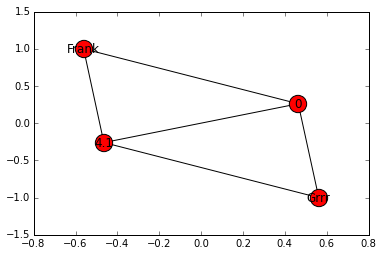

In [109]:
nx.draw_networkx(myGraph)

The ``size`` of my graph is the number of edges; the ``order`` is the number of nodes:

In [110]:
myGraph.size()    # Number of edges?

5

In [111]:
myGraph.order()    # Number of nodes?

4

#### An aside: ``tuple``s!

The output of ``edges()`` might look a bit unfamiliar. You can see that the method returned a list, denoted by the square brackets ``[]``. But each item in the list is actually **two** items, surrounded by parentheses. For example, ``(0, 'Frank')``. This is called a ``tuple``. 

A ``tuple`` is pretty similar to a ``list``. It holds a sequence of items, just like a list. I can create a tuple just like I do a list, except that I use parentheses instead of square brackets:

In [10]:
(0, 1, 2)

(0, 1, 2)

Just like a list, ``tuple``s can be any length. We call a ``tuple`` with two items a "two-tuple", and one with three items a "three-tuple", etc.

The **really big difference** between ``tuple``s and ``list``s is this: a ``list`` can be changed, whereas a ``tuple`` cannot.

That might seem a bit hard to process, so let's break it down. Suppose I create some new ``list`` object, which I'll call ``myList``.

In [32]:
myList = ['a', 'b', 'c', 1, 2]

We can get the address of our ``list`` object in memory using the ``id()`` function.

In [33]:
id(myList)

4400548752

Now that I've created my ``list``, I see that I forgot to add an item to the end. I can ``append`` an item to the ``list`` like so:

In [34]:
myList.append(3)

In [35]:
myList

['a', 'b', 'c', 1, 2, 3]

Voila! Much better. I have appended to the ``list``.

Let's check the memory address of our ``list`` object again.

In [36]:
id(myList)

4400548752

Notice that the address of our ``list`` has not changed.

I can also combine lists using the ``+=`` operator:

In [16]:
myList += ['X', 'Y', 'Z']

In [17]:
myList

['a', 'b', 'c', 1, 2, 3, 'X', 'Y', 'Z']

In [37]:
id(myList)

4400548752

I added three items to the end of the list. Notice that the memory address still hasn't changed! Let's change and individual items by assigning to its index:

In [18]:
myList[1] = 'bee'

In [19]:
myList

['a', 'bee', 'c', 1, 2, 3, 'X', 'Y', 'Z']

In [38]:
id(myList)    # Still the same!

4400548752

Each of the three times that I changed my ``list``, above, I was simply making changes to a single ``list`` object. First I added an item, then I added some more items, and then I changed an item. Even though the items in the ``list`` changed, I was working with the **same list** located in the same location in memory.

In Python, we refer to this ability to change as **mutability**. If a class/type is mutable, then its attributes can change.

In contrast, a ``tuple`` is **immutable**. Suppose that I create a two-tuple, like so:

In [45]:
myTuple = (0, 'b')

In [46]:
myTuple

(0, 'b')

In [47]:
id(myTuple)

4400177880

Now I want to extend the tuple by tacking on a couple more items:

In [48]:
myTuple += (2, 'd')

In [49]:
myTuple

(0, 'b', 2, 'd')

In [50]:
id(myTuple)

4400707288

Notice that the memory address has changed! When I extended my ``tuple`` I wasn't really extending it at all: instead, Python took the items from my existing ``tuple`` (``0``, ``'b'``) and the items from the ``tuple`` that I wanted to concatenate (``2``, ``'d'``), and created a **brand new ``tuple``** containing those items. We refer to that new ``tuple`` using the name of my old tuple, ``myTuple``.

### 4.3. Node and edge attributes.

When you create nodes and edges, you can add attributes to them. Let's make a small social network; each node will represent a person, and each edge will represent a social tie between two people.

In [72]:
socialGraph = nx.Graph()

Here we add some nodes, one per person, with a few attributes. We'll give each node an ``age`` attribute and an ``income`` attribute.

In [73]:
socialGraph.add_node('Frank Jones', {'age': 37, 'income': 87000.92})
socialGraph.add_node('Susan Gates', {'age': 41, 'income': 67042.01})
socialGraph.add_node('Jane Jackson', {'age': 22, 'income': 205939.12})

When I list my nodes using ``nodes()``, I can pass the keyword argument ``data=True`` to see the attributes associated with each node.

In [74]:
socialGraph.nodes(data=True)

[('Frank Jones', {'age': 37, 'income': 87000.92}),
 ('Jane Jackson', {'age': 22, 'income': 205939.12}),
 ('Susan Gates', {'age': 41, 'income': 67042.01})]

If I want to change an attribute for a node, or add new attributes, I can do that by changing values in the graph's ``node`` attribute:

In [75]:
socialGraph.node['Frank Jones']['age'] = 38
socialGraph.node['Susan Gates']['favoriteColor'] = 'red'

In [76]:
socialGraph.nodes(data=True)

[('Frank Jones', {'age': 38, 'income': 87000.92}),
 ('Jane Jackson', {'age': 22, 'income': 205939.12}),
 ('Susan Gates', {'age': 41, 'favoriteColor': 'red', 'income': 67042.01})]

We can do the same thing for edges:

In [77]:
socialGraph.add_edge('Frank Jones', 'Susan Gates', {'yearsKnown': 5, 'status': 'friends'})
socialGraph.add_edge('Susan Gates', 'Jane Jackson', {'yearsKnown': 0.25, 'status': 'acquaintances'})
socialGraph.add_edge('Frank Jones', 'Jane Jackson', {'yearsKnown': 2, 'status': 'friends'})

In [78]:
socialGraph.edge['Susan Gates']['Frank Jones']['yearsKnown'] = 3   # Change a value.

In [79]:
socialGraph.edges(data=True)

[('Frank Jones', 'Jane Jackson', {'status': 'friends', 'yearsKnown': 2}),
 ('Frank Jones', 'Susan Gates', {'status': 'friends', 'yearsKnown': 3}),
 ('Jane Jackson',
  'Susan Gates',
  {'status': 'acquaintances', 'yearsKnown': 0.25})]

Here's the graph that we just created:

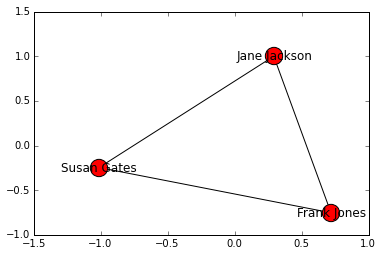

In [82]:
nx.draw_networkx(socialGraph)

#### Aside: dictionaries!

In the examples above, you may have noticed that we used curly braces ``{}`` when defining attributes. The curly braces denote an object called a **dictionary** (``dict``). A dictionary is an object that stores key-value pairs. 

For example, I might want to be able to look up a bunch of people by their student IDs. To do that, I could create a dictionary with student IDs as keys, and names as values:

In [83]:
students = {    # I was born in the 1980s...
    292883094: 'Bob Dole',
    940528892: 'Ross Perot',
    940927000: 'Janet Reno',
}

The part on the left of the colon ``:`` is the key, and the part on the right is the value. Notice that each key:value pair is separated by a comma.

I can look up values using their keys:

In [84]:
students[292883094]

'Bob Dole'

I can change values, or add new ones, using something similar to the ``list`` index notation, using square braces ``[]``.

In [85]:
students[292883095] = 'Michael Jackson'    # A new value.
students[940927000] = 'Janet Wood Reno'    # Changing an existing value.

In [86]:
students

{292883094: 'Bob Dole',
 292883095: 'Michael Jackson',
 940528892: 'Ross Perot',
 940927000: 'Janet Wood Reno'}

Anything can be a value, but only **some** things can be keys. An object can only be used as a key if it is **immutable**. Here are some things that are immutable:

* Tuples,
* Strings,
* Integers

In [87]:
myDict = {}
myDict['a string key'] = 'and its value'

In [88]:
myDict[('A', 'Tuple', 'Key')] = 'can also be used'

In [89]:
myDict[[0, 1, 2]] = 'but not a list!'

TypeError: unhashable type: 'list'

Whoops! I tried to use a ``list`` as a key, and got an error. That's because ``list``s are mutable (they can be changed).

### 4.4. Serializing your graph

Once you have created a graph in NetworkX, it's a good idea to save it. This way you can use it later on, share it with your colleagues, put it in an archive, or load it into another program for analysis and visualization. We can **serialize** (transform into something that we can store) and **deserialize** (load from disk into Python objects) a graph using NetworkX's [reading and writing functions](https://networkx.github.io/documentation/latest/reference/readwrite.html).

For example, to serialize a graph in the [GraphML file format](http://graphml.graphdrawing.org/), we can use the ``write_graphml()`` function. The first argument should be the graph object that we want to save, and the second argument should be the path where we want to save it (the file will be created).

In [90]:
nx.write_graphml(socialGraph, '/Users/erickpeirson/Desktop/socialGraph.graphml')

If you were to open the file ``socialGraph.graphml`` in a text editor, you should see something like this:

```xml
<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <key attr.name="yearsKnown" attr.type="double" for="edge" id="d5" />
  <key attr.name="yearsKnown" attr.type="int" for="edge" id="d4" />
  <key attr.name="status" attr.type="string" for="edge" id="d3" />
  <key attr.name="favoriteColor" attr.type="string" for="node" id="d2" />
  <key attr.name="income" attr.type="double" for="node" id="d1" />
  <key attr.name="age" attr.type="int" for="node" id="d0" />
  <graph edgedefault="undirected">
    <node id="Frank Jones">
      <data key="d0">38</data>
      <data key="d1">87000.92</data>
    </node>
    <node id="Jane Jackson">
      <data key="d0">22</data>
      <data key="d1">205939.12</data>
    </node>
    <node id="Susan Gates">
      <data key="d0">41</data>
      <data key="d2">red</data>
      <data key="d1">67042.01</data>
    </node>
    <edge source="Frank Jones" target="Jane Jackson">
      <data key="d3">friends</data>
      <data key="d4">2</data>
    </edge>
    <edge source="Frank Jones" target="Susan Gates">
      <data key="d3">friends</data>
      <data key="d4">3</data>
    </edge>
    <edge source="Jane Jackson" target="Susan Gates">
      <data key="d3">acquaintances</data>
      <data key="d5">0.25</data>
    </edge>
  </graph>
</graphml>
```

This XML document contains all of the elements in my ``Graph`` object: the nodes, the edges, and all of their attributes. If I want to visualize this graph, I can now load it in a program like [Cytoscape](http://cytoscape.org/).

To **deserialize** (load) a graph from GraphML, you can use the ``read_graphml()`` function:

In [91]:
loadedGraph = nx.read_graphml('/Users/erickpeirson/Desktop/socialGraph.graphml')    # Path to my file.

In [92]:
loadedGraph

## Stuff to try:

Try creating a more complex graph from your social network. If you use Facebook or Google Plus, take a look at your friends list, and add a sample of them (say, 30) to a new ``Graph`` object. Then add edges between friends that know each other. Then, serialize the graph to GraphML and load it in Cytoscape.